In [1]:
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/

########################################
TCR = "local" #local;global
season = "Annual" #Annual; JJA; DJF
stat = "median" #median;STD
path = "SPECIFY_DATA_PATH" #SPECIFY_DATA_PATH
########################################


"""
ANNUAL
"""
defor_local = np.asarray(Dataset(f"{path}/full_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_local = np.asarray(Dataset(f"{path}/full_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])

defor_dT = np.asarray(Dataset(f"{path}/dT_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_dT = np.asarray(Dataset(f"{path}/dT_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])

defor_dC = np.asarray(Dataset(f"{path}/dC_defor_{season}_TCR_X_{stat}.nc","r")["data"][:])
refor_dC = np.asarray(Dataset(f"{path}/dC_refor_{season}_TCR_X_{stat}.nc","r")["data"][:])


"""
DJF
"""
season = "DJF"

defor_dT_DJF = np.asarray(Dataset(f"{path}/dT_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_dT_DJF = np.asarray(Dataset(f"{path}/dT_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])


defor_local = np.flip(defor_local,axis=0)
refor_local = np.flip(refor_local,axis=0)
defor_dT = np.flip(defor_dT,axis=0)
refor_dT = np.flip(refor_dT,axis=0)
defor_dC = np.flip(defor_dC,axis=0)
refor_dC = np.flip(refor_dC,axis=0)
defor_dT_DJF = np.flip(defor_dT_DJF,axis=0)
refor_dT_DJF = np.flip(refor_dT_DJF,axis=0)


dT threshold (mean + std) 66.82026
dC threshold (mean + std) 563.4026
before pcolormesh
after pcolormesh


<function matplotlib.pyplot.show(*args, **kw)>

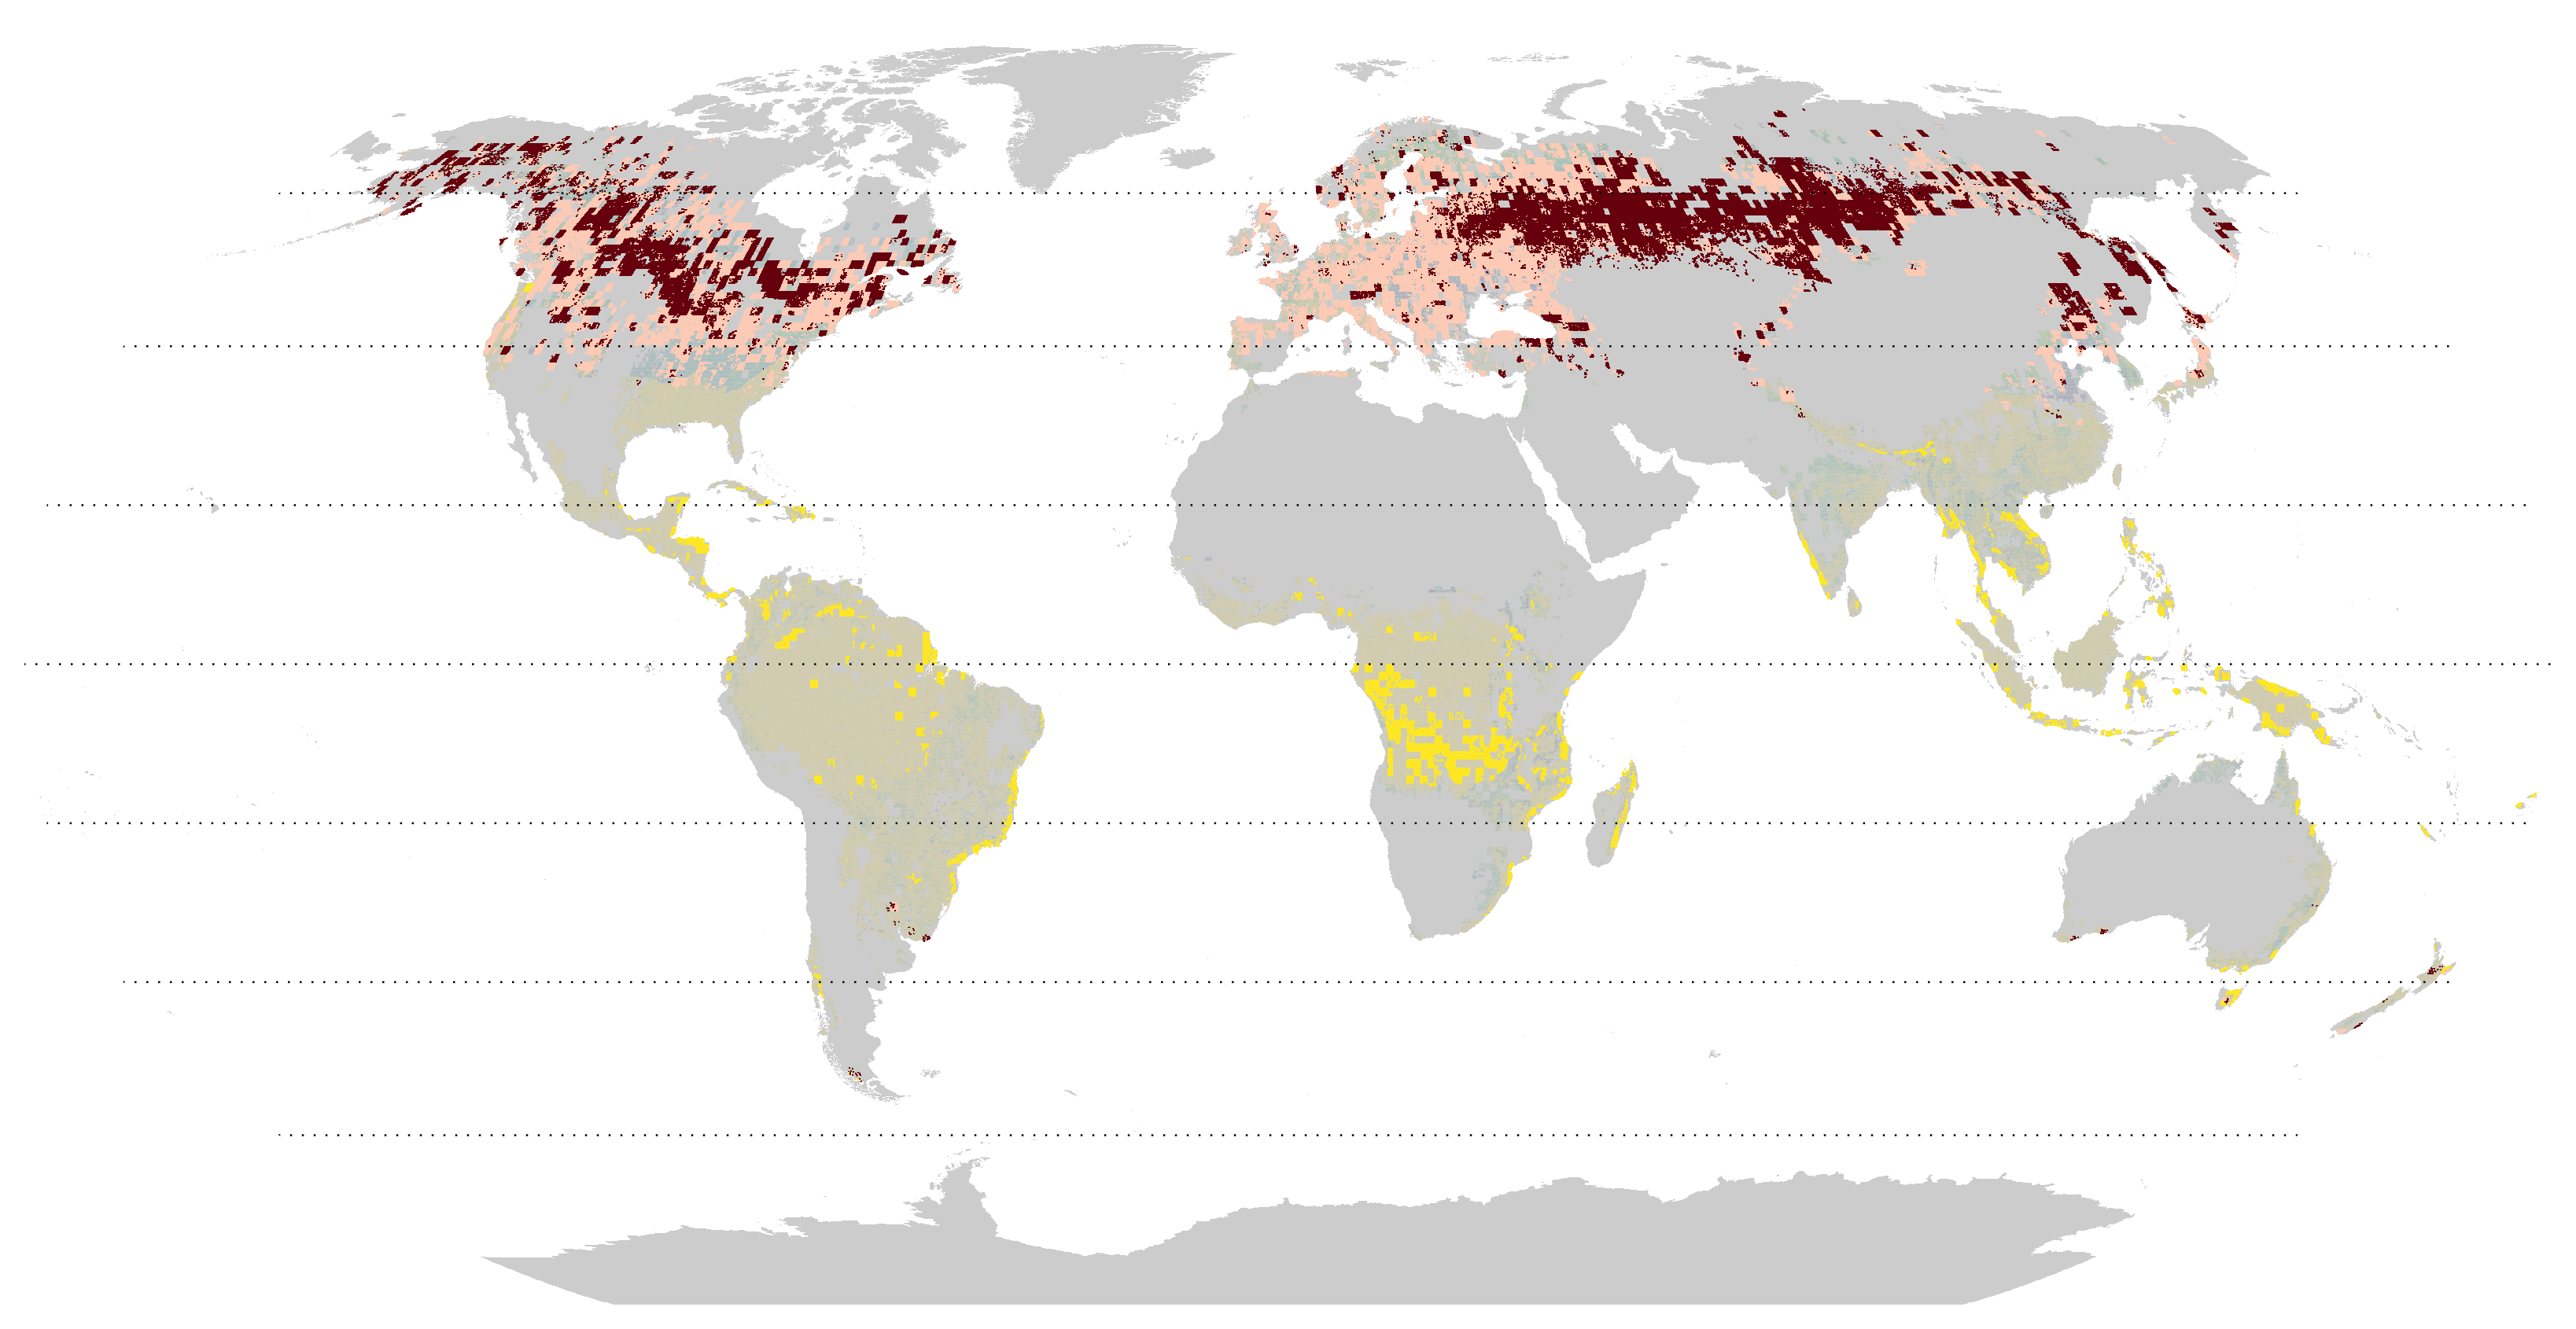

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

#Modify Datasets for plotting
###
dT_all = np.concatenate((defor_dT[~np.isnan(defor_dT)],refor_dT[~np.isnan(refor_dT)]),axis=0)
dC_all = np.concatenate((defor_dC[~np.isnan(defor_dC)],refor_dC[~np.isnan(refor_dC)]),axis=0)

dT_thresh = np.nanstd(dT_all)+np.nanmean(dT_all)
print("dT threshold (mean + std)",dT_thresh)
dC_thresh = np.nanstd(dC_all)+np.nanmean(dC_all)
print("dC threshold (mean + std)",dC_thresh)
                      
dT_mask_defor = (defor_dT>=dT_thresh)
dT_mask_refor = (refor_dT>=dT_thresh)
dT_mask = np.logical_or(dT_mask_defor,dT_mask_refor)

dC_mask_defor = (defor_dC>=dC_thresh)
dC_mask_refor = (refor_dC>=dC_thresh)
dC_mask = np.logical_or(dC_mask_defor,dC_mask_refor)

synergy_mask = np.logical_and(dT_mask,dC_mask)
synergy_mask=np.int16(synergy_mask)
hatching = np.ma.masked_less(synergy_mask,0.9)

masked_defor = defor_local*synergy_mask
masked_defor[masked_defor==0]=np.nan
masked_refor = refor_local*synergy_mask
masked_refor[masked_refor==0]=np.nan

##INIT
opposed_ANN_defor=np.ones_like(defor_dT_DJF)*10
opposed_ANN_defor[np.isnan(defor_dT)]=np.nan
opposed_ANN_defor[720:1440,:]=np.nan
opposed_ANN_refor=np.ones_like(defor_dT_DJF)*10
opposed_ANN_refor[np.isnan(refor_dT)]=np.nan
opposed_ANN_refor[720:1440,:]=np.nan

opposed_DJF_defor=np.ones_like(defor_dT_DJF)*2
opposed_DJF_defor[np.isnan(defor_dT_DJF)]=np.nan
opposed_DJF_defor[720:1440,:]=np.nan
opposed_DJF_refor=np.ones_like(defor_dT_DJF)*2
opposed_DJF_refor[np.isnan(refor_dT_DJF)]=np.nan
opposed_DJF_refor[720:1440,:]=np.nan

synergy_ANN_defor = np.ones_like(defor_dT)*10
synergy_ANN_defor[np.isnan(defor_dT)]=np.nan
synergy_ANN_refor = np.ones_like(refor_dT)*10
synergy_ANN_refor[np.isnan(refor_dT)]=np.nan


##MASK
opposed_DJF_defor[defor_dT_DJF>0]=np.nan
opposed_DJF_refor[refor_dT_DJF>0]=np.nan

opposed_ANN_defor[defor_dT>0]=np.nan
opposed_ANN_refor[refor_dT>0]=np.nan

synergy_ANN_defor[synergy_mask==0]=np.nan
synergy_ANN_refor[synergy_mask==0]=np.nan



###



#let Latex render the text
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

mpl.rcParams.update(nice_fonts)


      
fig = plt.figure(figsize=(14.4,7.2), dpi=300)
ax = plt.gca()

m = Basemap(projection='robin',lon_0=0,resolution='l',area_thresh=1000)

m.drawmapboundary(color='w',linewidth=0.1)
m.drawlsmask(land_color='0.8',ocean_color='w',resolution='h',lakes=False)

parallels = np.arange(-60,61,20.)
m.drawparallels(parallels,color='0.0',linewidth=0.6,dashes=[1,5])


lat_large = np.arange(-90,90,180/np.size(defor_local,0))
lon_large = np.arange(-180,180,360/np.size(defor_local,1))



lon2d, lat2d = np.meshgrid(lon_large, lat_large)
x, y = m(lon2d, lat2d)


cmap=plt.get_cmap('viridis',5)
cmap.set_under(color='tab:pink') 
print('before pcolormesh')
###BASE
m.pcolormesh(x, y, np.flip(defor_local,axis=0),rasterized=True, cmap=cmap,vmin=-0.001,vmax=400+1,alpha=0.03)

m.pcolormesh(x, y, np.flip(refor_local,axis=0),rasterized=True, cmap=cmap,vmin=-0.001,vmax=400+1,alpha=0.03)

###OPPOSITION
m.pcolormesh(x, y, np.flip(opposed_DJF_defor,axis=0),rasterized=True, cmap='Reds',vmin=0,vmax=10,alpha=1.)

m.pcolormesh(x, y, np.flip(opposed_DJF_refor,axis=0),rasterized=True, cmap='Reds',vmin=0,vmax=10,alpha=1.)

m.pcolormesh(x, y, np.flip(opposed_ANN_defor,axis=0),rasterized=True, cmap='Reds',vmin=0,vmax=10,alpha=1.)

m.pcolormesh(x, y, np.flip(opposed_ANN_refor,axis=0),rasterized=True, cmap='Reds',vmin=0,vmax=10,alpha=1.)

###SYNERGY
m.pcolormesh(x, y, np.flip(masked_defor,axis=0),rasterized=True, cmap=cmap,vmin=-0.001,vmax=400+1,alpha=1.)

m.pcolormesh(x, y, np.flip(masked_refor,axis=0),rasterized=True, cmap=cmap,vmin=-0.001,vmax=400+1,alpha=1.)
print('after pcolormesh')



plt.show